In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("/Users/Srikar/Documents/Semester 5/AI/Lab/Dataset/Mall_Customers.csv.xls")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df = df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'})
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df=df.drop(['CustomerID'],axis=1)

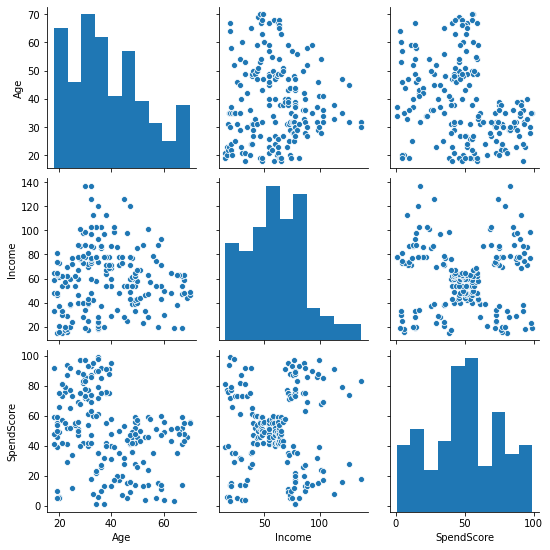

In [7]:
sns.pairplot(df)

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df1 = pd.DataFrame(df)
df1['Gender'] = le.fit_transform(df1['Gender'])
print(df1['Gender'].unique())

[1 0]


In [9]:
X=df1.drop(['SpendScore','Gender'],axis=1)
X.shape

(200, 2)

In [10]:
X.head()

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [11]:
from sklearn import metrics
db = DBSCAN(eps = 8, min_samples = 9)
db.fit_predict(X)
labels = db.labels_
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


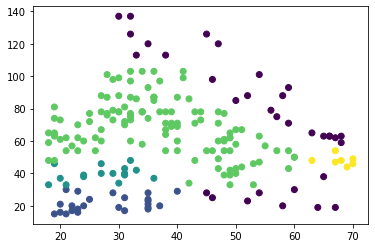

In [12]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = labels)

No of clusters: 1


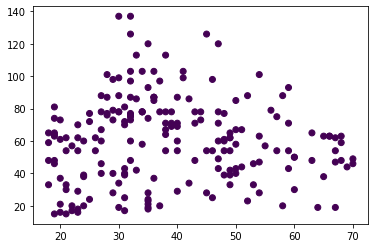

In [13]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps = 12.75, min_samples = 3)
db.fit_predict(X)
labels = db.labels_
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print('No of clusters:',n_clusters)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = labels)

No of clusters: 2


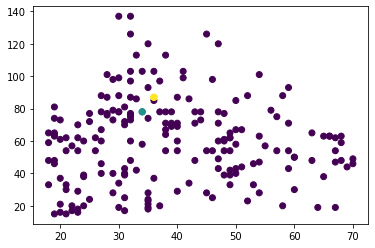

In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps = 0.25, min_samples = 3)
db.fit_predict(X)
labels = db.labels_
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print('No of clusters:',n_clusters)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = labels)